# Importação das bibliotecas necessárias para o desenvolvimento da aplicação

In [ ]:
# Bibliotecas auxiliares
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Bibliotecas principais
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, FunctionTransformer, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, average_precision_score, ConfusionMatrixDisplay
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, HistGradientBoostingClassifier

# Seleção de features e de rótulo para criação dos DataFrames

## 1° Trimestre de 2023

In [ ]:
colunas_especificas = [
    (5, 7), # Unidade da Federação
    (32, 33), # Situação do domicílio, urbano ou rural
    (33, 34), # Domicílio em Região Metropolina
    (88, 90), # Número de pessoas no domicílio
    (94, 95), # Sexo
    (103, 106), # Idade de 0 a 130
    (106, 107), # Cor ou raça
    (151, 155), # Qual era o seu trabalho?
    (155, 156), # Qual setor trabalha?
    (124, 126), # Qual foi o curso mais elevado que frequentou anteriormente?
    (240, 243), # Quantas horas você trabalhava no serviço principal por semana?
    (246, 247), # Quanto tempo já trabalhou neste último emprego? (até 2 anos)
    (251, 253), # Quanto tempo já trabalhou neste último emprego? (anos)
    (579, 587) # Total do Rendimento Individual
]

In [ ]:
colunas_nomes = [
    "uf",
    "zona_domicilio",
    "regiao_domicilio",
    "tam_domicilio",
    "sexo",
    "idade",
    "cor/raca",
    "qual_trabalho",
    "setor_trabalha",
    "escolaridade",
    "qnt_hrs_trabalha",
    "qnt_tempo_trabalha_2_anos",
    "qnt_tempo_trabalha_+anos",
    "renda_individual_total"
]

In [ ]:
df = pd.read_fwf("/content/drive/MyDrive/Arquivo_IBGE/PNADC_2023_trimestre1.txt",
                 colspecs=colunas_especificas,
                 names=colunas_nomes)

## Demais semestres
### Depois de diversas análises com outros semestres, concluí que o ganho de informação era pequeno. Sendo assim, não adicionei no df final


---



### 2° Trimestre de 2023

In [ ]:
colunas_especificas2 = [
    (5, 7), # Unidade da Federação
    (32, 33), # Situação do domicílio, urbano ou rural
    (33, 34), # Domicílio em Região Metropolina
    (88, 90), # Número de pessoas no domicílio
    (94, 95), # Sexo
    (103, 106), # Idade de 0 a 130
    (106, 107), # Cor ou raça
    (192, 193), # Quantos trabalhos tinha na semana?
    (193, 197), # Qual era o seu trabalho?
    (197, 198), # Qual setor trabalha?
    (127, 129), # Qual foi o curso mais elevado que frequentou anteriormente?
    (282, 285), # Quantas horas você trabalhava no serviço principal por semana?
    (287, 288), # Quanto tempo já trabalhou neste último emprego? (até 2 anos)
    (293, 295), # Quanto tempo já trabalhou neste último emprego? (anos)
    (652, 660) # Total do Rendimento Individual
]

colunas_nomes2 = [
    "uf",
    "zona_domicilio",
    "regiao_domicilio",
    "tam_domicilio",
    "sexo",
    "idade",
    "cor/raca",
    "multiplos_trabalhos",
    "qual_trabalho",
    "setor_trabalha",
    "escolaridade",
    "qnt_hrs_trabalha",
    "qnt_tempo_trabalha_2_anos",
    "qnt_tempo_trabalha_+anos",
    "renda_individual_total"
]

In [ ]:
#df2 = pd.read_fwf("/content/drive/MyDrive/Arquivo_IBGE/PNADC_2023_trimestre2.txt", colspecs=colunas_especificas2, names=colunas_nomes2)

### 4° Trimestre de 2023

In [ ]:
colunas_especificas4 = [
    (5, 7), # Unidade da Federação
    (32, 33), # Situação do domicílio, urbano ou rural
    (33, 34), # Domicílio em Região Metropolina
    (88, 90), # Número de pessoas no domicílio
    (94, 95), # Sexo
    (103, 106), # Idade de 0 a 130
    (106, 107), # Cor ou raça
    (150, 151), # Quantos trabalhos tinha na semana?
    (151, 155), # Qual era o seu trabalho?
    (155, 156), # Qual setor trabalha?
    (124, 126), # Qual foi o curso mais elevado que frequentou anteriormente?
    (240, 243), # Quantas horas você trabalhava no serviço principal por semana?
    (246, 247), # Quanto tempo já trabalhou neste último emprego? (até 2 anos)
    (251, 253), # Quanto tempo já trabalhou neste último emprego? (anos)
    (1196, 1204) # Total do Rendimento Individual
]

colunas_nomes4 = [
    "uf",
    "zona_domicilio",
    "regiao_domicilio",
    "tam_domicilio",
    "sexo",
    "idade",
    "cor/raca",
    "multiplos_trabalhos",
    "qual_trabalho",
    "setor_trabalha",
    "escolaridade",
    "qnt_hrs_trabalha",
    "qnt_tempo_trabalha_2_anos",
    "qnt_tempo_trabalha_+anos",
    "renda_individual_total"
]

In [ ]:
#df4 = pd.read_fwf("/content/drive/MyDrive/Arquivo_IBGE/PNADC_2023_trimestre4.txt", colspecs=colunas_especificas4, names=colunas_nomes4)

### Agregação dos DataFrames

In [ ]:
#df = pd.concat([df1, df2, df4], axis=0, ignore_index=True)

# Formatação básica dos dados

In [ ]:
df.describe()

,uf,zona_domicilio,regiao_domicilio,tam_domicilio,sexo,idade,cor/raca,qual_trabalho,setor_trabalha,escolaridade,qnt_hrs_trabalha,qnt_tempo_trabalha_2_anos,qnt_tempo_trabalha_+anos,renda_individual_total
count,473335.000000,473335.000000,473335.000000,473335.000000,473335.000000,473335.000000,473335.000000,200106.000000,200106.000000,315746.000000,200106.000000,200106.000000,136255.000000,3.000470e+05
mean,30.891768,1.266663,3.039308,3.502633,1.515713,37.342502,2.623795,5857.758138,4.027475,8.796111,38.715326,3.423940,11.780412,8.281012e+04
std,11.002041,0.442215,1.299478,1.597400,0.499754,22.223984,1.433491,2396.949903,1.566288,2.521150,11.681615,0.913814,10.620648,2.832890e+06
min,11.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000e+00
25%,23.000000,1.000000,2.000000,2.000000,1.000000,18.000000,1.000000,4110.000000,3.000000,7.000000,36.000000,3.000000,4.000000,1.220000e+03
50%,31.000000,1.000000,4.000000,3.000000,2.000000,37.000000,4.000000,5414.000000,3.000000,10.000000,40.000000,4.000000,8.000000,1.400000e+03
75%,41.000000,2.000000,4.000000,4.000000,2.000000,55.000000,4.000000,8153.000000,6.000000,10.000000,44.000000,4.000000,17.000000,2.514000e+03
max,53.000000,2.000000,4.000000,21.000000,2.000000,115.000000,9.000000,9629.000000,7.000000,15.000000,120.000000,4.000000,82.000000,1.000000e+08


In [ ]:
df.describe()
df.isna().sum()

,0
uf,0
zona_domicilio,0
regiao_domicilio,0
tam_domicilio,0
sexo,0
idade,0
cor/raca,0
qual_trabalho,273229
setor_trabalha,273229
escolaridade,157589


### Variáveis Categóricas Nominais


---



In [ ]:
# Categórica Nominal
df['qual_trabalho'] = pd.cut(
    df['qual_trabalho'],
    bins=[100, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000],
    labels=[
    'militares',
    'diretores_gerentes',
    'ciencias_intelectuais',
    'tecnicos_medio',
    'apoio_administrativo',
    'comercio',
    'rural',
    'construcao',
    'operadores_maquinas',
    'ocupacoes_elementares'
    ]
)

In [ ]:
# Categórica Nominal
condicao = [
    df['qnt_tempo_trabalha_2_anos'].isna(), # Primeira condição
    df['qnt_tempo_trabalha_2_anos'].isin([1, 2, 3]) # Segunda condição
]

booleano = [
    np.nan, # Verdadeiro para primeira condição
    1 # Verdadeiro para segunda condição
]

df['qnts_anos_trabalha'] = np.select(
    condicao,
    booleano,
    default=df['qnt_tempo_trabalha_+anos'] # Valor padrão se tudo for falso
)

df['qnts_anos_trabalha'] = pd.cut(
    df['qnts_anos_trabalha'],
    bins=[0, 2, 5, 10, np.inf],
    labels=['2anos', '5anos', '10anos', '+10anos']
)

df = df.drop(columns=['qnt_tempo_trabalha_+anos', 'qnt_tempo_trabalha_2_anos'])

In [ ]:
# Categórica Nominal
df['qnt_hrs_trabalha'] = pd.cut(
    df['qnt_hrs_trabalha'],
    bins=[0, 31, 41, 51, np.inf],
    labels=['30hrs', '40hrs', '50hrs', '+50hrs']
)

In [ ]:
# Categórica Nominal
df['tam_domicilio'] = pd.cut(
    df['tam_domicilio'],
    bins=[0, 1, 3, 5, np.inf],
    labels=['1', '2-3', '4-5', '6+']
)

In [ ]:
# Categórica Nominal
df['uf'] = df['uf'].replace({
    11: "norte",
    12: "norte",
    13: "norte",
    14: "norte",
    15: "norte",
    16: "norte",
    17: "norte",
    21: "nordeste",
    22: "nordeste",
    23: "nordeste",
    24: "nordeste",
    25: "nordeste",
    26: "nordeste",
    27: "nordeste",
    28: "nordeste",
    29: "nordeste",
    31: "sudeste",
    32: "sudeste",
    33: "sudeste",
    34: "sudeste",
    35: "sudeste",
    41: "sul",
    42: "sul",
    43: "sul",
    50: "centro_oeste",
    51: "centro_oeste",
    52: "centro_oeste",
    53: "centro_oeste"
})

In [ ]:
# Categórica Nominal
df['setor_trabalha'] = df['setor_trabalha'].replace({
    1: 'informal',
    2: 'emprego_publico',
    3: 'emprego_privado',
    4: 'emprego_publico',
    5: 'empregador',
    6: 'informal',
    7: 'informal'
})

In [ ]:
# Categórica Nominal
df['cor/raca'] = df['cor/raca'].replace({
    1: 'branca',
    2: 'preta',
    3: 'outras',
    4: 'parda',
    5: 'outras',
    9: np.nan
})

In [ ]:
# Categórica Nominal
# Sem formatação
df['sexo'] = df['sexo'].replace({
    1: 'masculino',
    2: 'feminino'
})

In [ ]:
# Categórica Nominal
# Sem formatação
df['zona_domicilio'] = df['zona_domicilio'].replace({
    1: 'urbano',
    2: 'rural'
})

In [ ]:
# Categórica Nominal
df['regiao_domicilio'] = df['regiao_domicilio'].replace({
    1: 'metropolitana',
    2: 'metropolitana',
    3: 'fora_metropolitana',
    4: 'fora_metropolitana'
})

### Variáveis Categóricas Ordinais


---

In [ ]:
df['escolaridade'].value_counts()

,count
escolaridade,
10.0,113884
7.0,86060
12.0,43234
5.0,33064
13.0,11588
3.0,6176
6.0,5222
11.0,4541
9.0,3499


In [ ]:
# Categórica Ordinal
df['escolaridade'] = pd.cut(
    df['escolaridade'],
    bins=[0, 8, 11, 12],
    labels=['fundamental', 'medio', 'superior']
)

In [ ]:
df['escolaridade'].value_counts()

,count
escolaridade,
fundamental,136530
medio,121924
superior,43234


### Variáveis Númericas Discretas


---

In [ ]:
# Apenas pessoas adultas
df = df[df['idade'] >= 18]

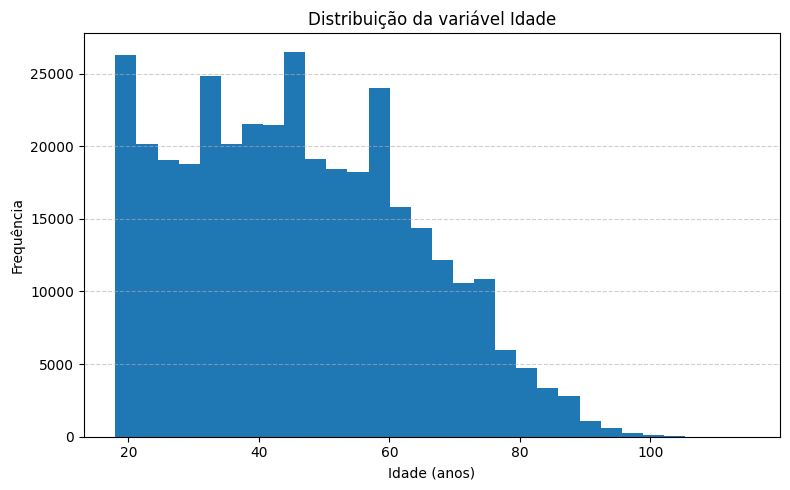

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df['idade'], bins=30)
plt.title('Distribuição da variável Idade')
plt.xlabel('Idade (anos)')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Variável Target (y)


---

In [ ]:
# Salário mínimo necessário de acordo com DIEESE em janeiro de 2023: R$ 6.641,58
smn_dieese = 6641.58
smn_dieese_2provedores = smn_dieese / 2

# Criação da nova coluna, possui_smn, e remoção de linhas nas quais y (target) é ausente
df = df.dropna(subset='renda_individual_total')
df['possui_smn'] = (smn_dieese_2provedores <= df['renda_individual_total']).astype(int)
df = df.drop(columns='renda_individual_total') # remoção da coluna com dados brutos

# Separação dos dados em treino e teste

In [ ]:
x = df.drop(columns='possui_smn')
y = df['possui_smn']

In [ ]:
y.value_counts()

,count
possui_smn,
0,241929
1,50027


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    train_size=0.8,
                                                    random_state=42,
                                                    stratify=y)

# Pré-processamento dos dados usando Pipeline e estimadores

In [ ]:
# colunas númericas discretas
num_cols = ['idade']

# pipeline para num_cols
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('log1p', FunctionTransformer(func=np.log1p, validate=False, feature_names_out='one-to-one')),
    ('scaler', StandardScaler())
])

# colunas categóricas nominal
cat_cols = ['uf', 'cor/raca', 'setor_trabalha', 'tam_domicilio',
            'sexo', 'zona_domicilio', 'regiao_domicilio', 'qual_trabalho',
            'qnt_hrs_trabalha', 'qnts_anos_trabalha']

# pipeline para cat_cols
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', sparse_output=False))
])

# colunas categóricas ordinal
ord_cols = ['escolaridade']

# pipeline para ord_cols
ord_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(categories=[['fundamental', 'medio', 'superior']]))
])

# junção dos pipelines para cada tipo de dados
preprocessing = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols),
        ('ord', ord_pipeline, ord_cols)
    ]
)

# Treinando o Modelo

In [ ]:
log_reg = LogisticRegression(
    penalty='l2',
    C=0.1,
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

gb = HistGradientBoostingClassifier(
    max_iter=150,
    learning_rate=0.05,
    max_depth=3,
    class_weight='balanced',
    random_state=42
)

voting_clf = VotingClassifier(
    estimators=[
        ('log_reg', log_reg),
        ('rf', rf),
        ('gb', gb)
    ],
    voting='soft',
    weights=[1, 1, 1]
)

model = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('voting_clf', voting_clf)
])

# Testando o Modelo (Base de dados: Treinamento)



In [ ]:
skf = StratifiedKFold(
    n_splits=3,
    shuffle=True,
    random_state=42
)

scoring = {
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

modelos = {
    'log_reg': log_reg,
    'rf': rf,
    'gb': gb,
    'voting': model
}

In [ ]:
performance_modelos = []
for nome, modelo_especifico in modelos.items():

    if nome != 'voting':
      pipe_individual = Pipeline(steps=[
          ('preprocessing', preprocessing),
          ('model', modelo_especifico)
      ])
    else:
      pipe_individual = modelo_especifico

    cv_results = cross_validate(
        pipe_individual,
        x_train,
        y_train,
        cv=skf,
        scoring=scoring,
        n_jobs=-1,
        return_train_score=False
    )


    performance_modelos.append({
        'modelo': nome,
        'precision': cv_results['test_precision'].mean(),
        'recall': cv_results['test_recall'].mean(),
        'F1-score': cv_results['test_f1'].mean()
    })

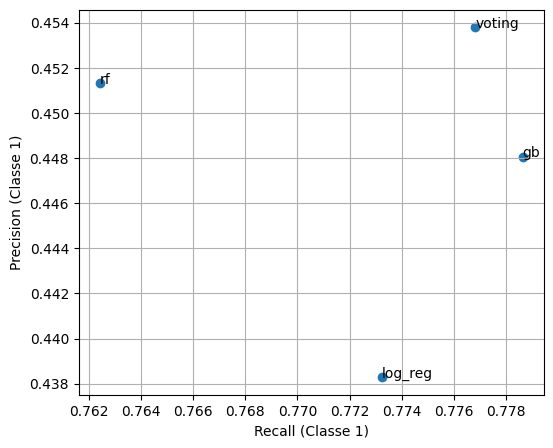

In [ ]:
df_perf = pd.DataFrame(performance_modelos)

plt.figure(figsize=(6, 5))
plt.scatter(df_perf['recall'], df_perf['precision'])

for _, row in df_perf.iterrows():
    plt.text(row['recall'], row['precision'], row['modelo'])

plt.xlabel('Recall (Classe 1)')
plt.ylabel('Precision (Classe 1)')
plt.grid(True)
plt.show()

In [ ]:
# df nos dados de treino
df_perf.head()

,modelo,precision,recall,F1-score
0,log_reg,0.438285,0.773244,0.559458
1,rf,0.451310,0.762425,0.566993
2,gb,0.448052,0.778641,0.568793
3,voting,0.453799,0.776817,0.572912


# Testando o Modelo (Base de dados: Teste)

In [ ]:
# Treinando o modelo
model.fit(x_train, y_train)

# Threshold customizado
threshold = 0.6

## Performance dos Modelos Separados

---



In [ ]:
X_test_proc = model.named_steps['preprocessing'].transform(x_test)

for nome, modelo_especifico in model.named_steps['voting_clf'].named_estimators_.items():

    y_proba_especifico = modelo_especifico.predict_proba(X_test_proc)[:, 1]
    y_pred_especifico = (y_proba_especifico >= threshold).astype(int)

    print("==================== Modelo:", nome, "====================")
    print("Acurácia:", accuracy_score(y_test, y_pred_especifico))
    print("Classificação Geral:\n", classification_report(y_test, y_pred_especifico))
    print("\n" * 2)

==================== Modelo: log_reg ====================
Acurácia: 0.8315693930675435
Classificação Geral:
               precision    recall  f1-score   support

           0       0.93      0.86      0.89     48386
           1       0.51      0.68      0.58     10006

    accuracy                           0.83     58392
   macro avg       0.72      0.77      0.74     58392
weighted avg       0.86      0.83      0.84     58392




==================== Modelo: rf ====================
Acurácia: 0.8514351280997396
Classificação Geral:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91     48386
           1       0.56      0.64      0.60     10006

    accuracy                           0.85     58392
   macro avg       0.74      0.77      0.75     58392
weighted avg       0.86      0.85      0.86     58392




==================== Modelo: gb ====================
Acurácia: 0.8411597479106727
Classificação Geral:
               precision

## Performance do Modelo VotingClassifier

---



Acurácia:  0.8455610357583231
Classificação Geral:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90     48386
           1       0.54      0.66      0.60     10006

    accuracy                           0.85     58392
   macro avg       0.73      0.77      0.75     58392
weighted avg       0.86      0.85      0.85     58392



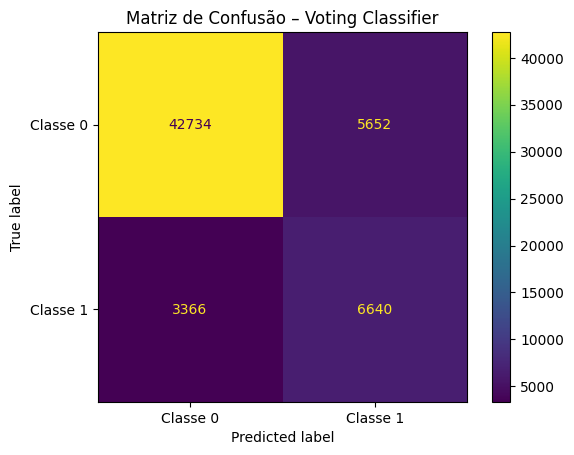

In [ ]:
# Probabilidades
y_proba = model.predict_proba(x_test)[:, 1]

y_pred = (y_proba >= threshold).astype(int)

print("Acurácia: ", accuracy_score(y_test, y_pred))
print("Classificação Geral:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Classe 0', 'Classe 1']
)

disp.plot(values_format='d')
plt.title('Matriz de Confusão – Voting Classifier')
plt.show()

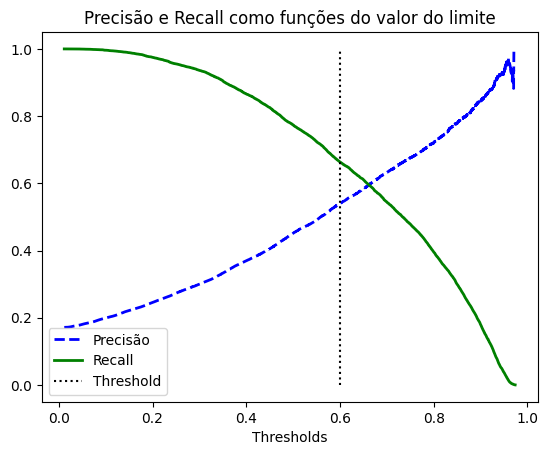

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

plt.plot(thresholds, precisions[:-1], "b--", label="Precisão", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="Threshold")
plt.title("Precisão e Recall como funções do valor do limite")
plt.xlabel("Thresholds")
plt.legend()
plt.show()

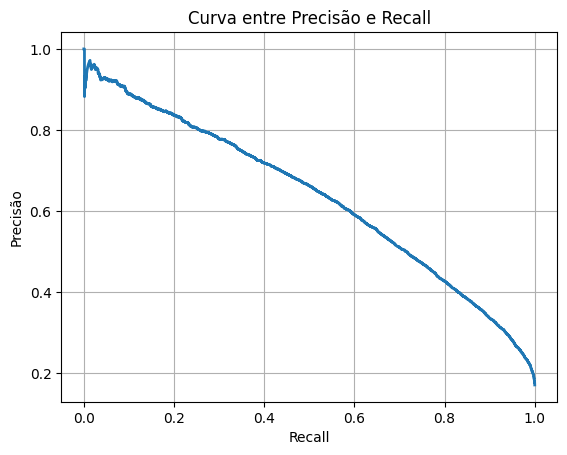

In [ ]:
plt.plot(recalls, precisions, linewidth=2)
plt.title("Curva entre Precisão e Recall")
plt.xlabel("Recall")
plt.ylabel("Precisão")
plt.grid(True)
plt.show()

### Acessando os coeficientes de regressão logística para maiores esclarecimentos

In [ ]:
log_reg_fitted = model.named_steps['voting_clf'].named_estimators_['log_reg']

preprocessor = model.named_steps['preprocessing']

feature_names = preprocessor.get_feature_names_out()

coef_df = pd.DataFrame({
    'feature': feature_names,
    'coeficiente': log_reg_fitted.coef_[0],
    'odds_ratio': np.exp(log_reg_fitted.coef_[0])
})

coef_df = coef_df.sort_values(by='coeficiente', ascending=False).reset_index(drop=True)
coef_df

,feature,coeficiente,odds_ratio
0,cat__qual_trabalho_ciencias_intelectuais,2.070236,7.926691
1,cat__qual_trabalho_militares,1.934938,6.923615
2,cat__qual_trabalho_diretores_gerentes,1.889207,6.614122
3,cat__qual_trabalho_tecnicos_medio,0.870980,2.389252
4,cat__sexo_masculino,0.665714,1.945880
5,cat__zona_domicilio_urbano,0.662555,1.939742
6,num__idade,0.579511,1.785164
7,ord__escolaridade,0.553143,1.738709
8,cat__regiao_domicilio_metropolitana,0.498768,1.646691
9,cat__qual_trabalho_rural,0.061113,1.063019
